In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [17]:
fuel_econ = pd.read_csv('fuel_econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [18]:
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])
# to only see for the trnasmission broader type i.e. automatic or manual only

In [19]:
ct_counts = fuel_econ.groupby(['VClass','trans_type']).size()
# to group by the Vclass and trans_type together in and see number of entries in each pair as a pandas series
ct_counts = ct_counts.reset_index(name = 'count')
# to change pandas series into dataframe
ct_counts = ct_counts.pivot(index = 'VClass', columns= 'trans_type', values = 'count')
# to set the dataframe such that rows are VClass, columns are trans_type and each cell contains total count

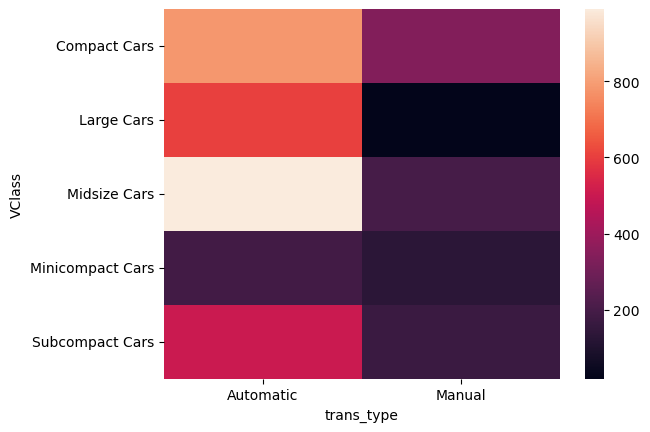

In [20]:
sb.heatmap(ct_counts);
# heatmap for qualitative vs quantitative data

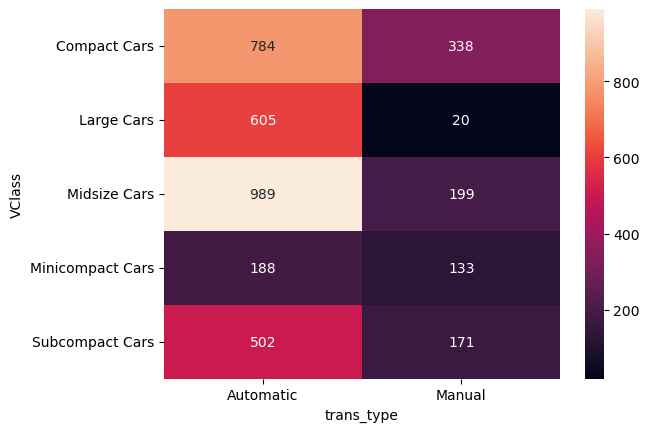

In [23]:
sb.heatmap(ct_counts, annot = True, fmt = 'd');
# annot = True sets the annotation for each point turned
# fmt = 'd' sets the decimal point on

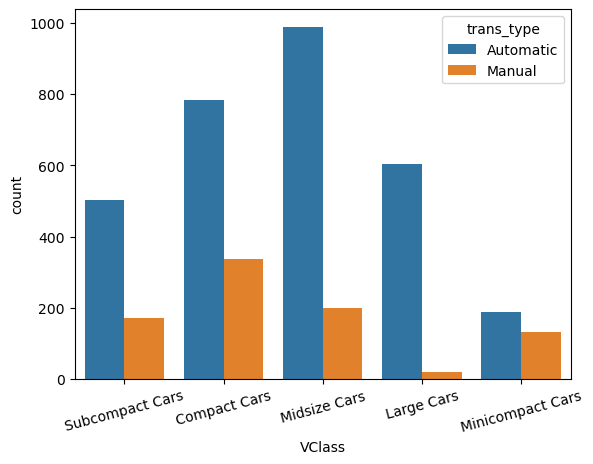

In [27]:
sb.countplot(data = fuel_econ, x = 'VClass', hue = 'trans_type');
# to add one more bar into the normal countplot just add the hue parameter for second variable
plt.xticks(rotation = 15);